# Influence de l'étendue spectrale de la source sur la figure d'interférences des fentes d'Young

In [11]:
# librairies pour l'interaction
%matplotlib notebook
from ipywidgets import interact, FloatSlider, IntSlider, Layout
import ipywidgets as widgets

In [12]:
# librairies scientifiques usuelles
from scipy.signal import gausspulse
from scipy import fftpack
# graphiques
import matplotlib.pyplot as plt
from numpy import pi, exp, linspace, cos, meshgrid, sinc
from matplotlib.colors import LinearSegmentedColormap

## Cas d'un doublet de longueurs d'onde

On étudie de fentes d'Young, séparées de $a$ = 1 mm, éclairées par un doublet de longueurs d'onde (voir le cours).

In [13]:
a = 1e-3 # m
# Le doublet jaune du sodium
lambda1 = 589.0 #nm
lambda2 = 589.6 #nm
D = 1 # m
Ds = 1 #m
I0 = 1

L'expression de la différence de marche permet de calculer l'intensité en un point donné :

In [14]:
def I(x, lambda0):
    return 2*I0*(1+cos(2*pi*a*x/(lambda0*1e-9*D)))

<IPython.core.display.Javascript object>


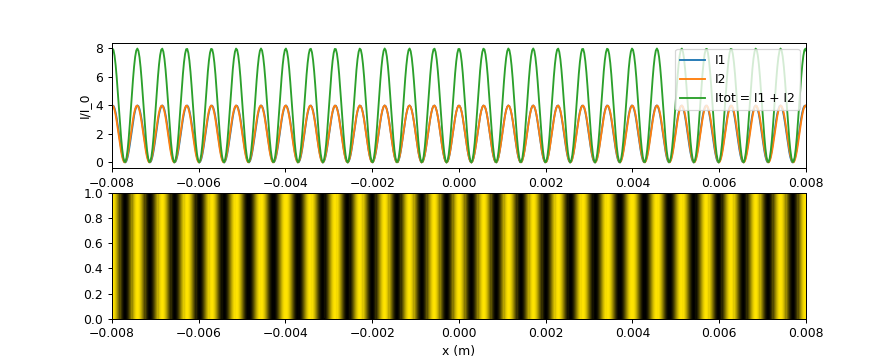

interactive(children=(FloatSlider(value=589.0, description='lambda1 (nm)', layout=Layout(width='100%'), max=60…

<function __main__.update_lambda(lambda1=589, lambda2=589.6, xlim=0.01)>

In [15]:
# Tracé du graphique

# paramètres d'affichage
xmax = 5e-2
npoints = 4000

# Couleur jaune sodium
cmap1 = LinearSegmentedColormap.from_list(
    "my_colormap", ((0, 0, 0), (1, .89, 0)), N=400, gamma=1.0)


fig = plt.figure("Brouillage de la figure d'interférences avec 2 sources", figsize=(10, 4))

# Tracé des courbes d'intensité

ax1 = plt.subplot(211)
x1 = linspace(-xmax, xmax, npoints)
l_S1, = plt.plot(x1, I(x1, lambda1), label='I1')
l_S2, = plt.plot(x1, I(x1, lambda2), label='I2')
l_tot, = plt.plot(x1, I(x1, lambda1) + I(x1, lambda2), label='Itot = I1 + I2')

plt.xlabel('x (m)')
plt.ylabel('I/I_0')
plt.legend(loc=1)
plt.xlim([-xmax, xmax])


# Tracé de la figure d'interférences
ax2 = plt.subplot(212)
y, x = meshgrid(linspace(0, 1, 2), linspace(-xmax, xmax, npoints))
z = I(x, lambda1) + I(x, lambda2)
z = z[:-1, :-1]
quad = plt.pcolormesh(x, y, z, cmap=cmap1)

plt.xlabel("x (m)")
plt.xlim([-xmax, xmax])


# Gestion des mises à jour lorsqu'on déplace le curseur

lambdamin = 570
lambdamax = 600
lambdastep = .1

lambda1_widget = FloatSlider(min=lambdamin, max=lambdamax, value=589, step=lambdastep,
                         layout=Layout(width='100%'), description='lambda1 (nm)',  readout_format='.1f')

lambda2_widget = FloatSlider(min=lambdamin, max=lambdamax, value=589.6, step=lambdastep,
                         layout=Layout(width='100%'), description='lambda2 (nm)',  readout_format='.1f')

xlim_widget = FloatSlider(min=1e-3, max=xmax, value=1e-2, step=1e-3,
                         layout=Layout(width='100%'), description='xlim (m)',  readout_format='.1e')


def update_lambda(lambda1=589, lambda2=589.6, xlim=1e-2):
    """Met à jour le graphique lorsqu'on déplace le curseur"""
    z = I(x, lambda1) + I(x, lambda2)
    z = z[:-1, :-1]
    l_S1.set_data([x1, I(x1, lambda1)])
    l_S2.set_data([x1, I(x1, lambda2)])
    l_tot.set_data([x1, I(x1, lambda1) + I(x1, lambda2)])
    ax1.set_xlim([-xlim, xlim])
    ax2.set_xlim([-xlim, xlim])
    quad.set_array(z.ravel())
    plt.draw()


interact(update_lambda, lambda1=lambda1_widget, lambda2=lambda2_widget, xlim=xlim_widget)